The following code is designed to facilitate the importation of critical data resources into the Kaggle notebook environment, specifically targeting the /kaggle/input directory. This step is essential for ensuring that datasets required for analysis or model training are readily accessible within your workspace. By running this code, you will automatically download and extract the necessary data files from predefined online sources directly into the /kaggle/input directory. This process is crucial before executing your data analysis or machine learning tasks.

# **Features and Mechanism**
**Environment Preparation:**

The code prepares the Kaggle environment by clearing previous data in the /kaggle/input directory. It uses shutil.rmtree() to remove any existing files and leverages os.makedirs() to recreate the directory structure with appropriate permissions.
Directory Symlinks:

The script creates symbolic links (os.symlink()) from Kaggle’s input and working directories to parent directories. This setup ensures ease of navigation and accessibility from standard locations.

**Data Source Mapping:**

Data source URLs are defined in the DATA_SOURCE_MAPPING variable. These URLs have been encoded to prevent errors during handling, which the script decodes using urllib.parse.unquote().

**Downloading and Extracting Data:**
Using the urllib library, the script requests and downloads data files in chunks. This method efficiently manages memory and handles large file sizes by reading in manageable pieces (CHUNK_SIZE).
The script handles both ZIP and TAR file formats, automatically extracting contents using the zipfile and tarfile libraries, respectively.

**Error Management:**

Robust error handling is implemented through try-except blocks, which captures and processes HTTP errors or OS-related exceptions. If a data source cannot be downloaded (for reasons such as expired links), the error is logged without halting the script.

**Completion Notification:**

Once the download and extraction process is complete, a confirmation message is printed to notify the user of successful data importation.
Considerations
**Environment Compatibility:** This script assumes execution within a Kaggle notebook environment. Differences in Python environments may cause discrepancies in library availability, which users must address by ensuring all dependencies are installed.

**Data Source Validity:** Given the nature of dynamically generated URLs (including expiration time), users should verify the validity and accessibility of URLs periodically.

**File Overwriting: **The script will overwrite existing data structures within the /kaggle/input directory, so users are advised to backup important data before execution.

This setup streamlines the onboarding of data required for natural language processing tasks, specifically focusing on efficient data management and accessibility.

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nlp-getting-started:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F17777%2F869809%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240906%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240906T060844Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c8e7381e6dc577c5ce6e309206f78eb9de7e007cf15c00e1d5ae2dd82693225227a7c7349e4832be5351fcef37de6b61e119c889aa55dc182b825a0df831b3625dbc5c7c888fd5a943320df21009aaef8c9dced2850bb6acfae2334d757f6bb0216835907da48d4526d490a4762b34a8ea99ebd52e30d1e2d23b0346a45c43636896a303a8e3c1744ef246913e38cb40db110ccf72b5698594fa0e24e6c49ca94aaceeff31f56203687067359685f2ab0fcc2945f85c5d6ede93f5589114de0bc3c84670eeb5d1e998f9ef3d598f5a49bee718dd9cc5aa16f64b4bf20a7da86b4d75181735785206d4a3686b3d1fdc62b5291875fb6f7bb17c450377d0478e5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 607343 bytes downloaded
Downloaded and uncompressed: nlp-getting-started
Data source import complete.




import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nlp-getting-started:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F17777%2F869809%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240905%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240905T211844Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3ac8c61670cf2d316f4b291a5542fc0c18d48a0c3fcf7cb49d42a61ec369795c8139bfe067ad44cc6cf9da396c1ba9df221711816016bfd0ac034da8060cd7afc50768f5c41f4250e9e89defad04adc275504723a1bc9729f4d0fda8a6c06c93a7f934f2ee07a936135c717374ef482a3d34df74cbea71c013339165d6c7b86b6b7e63309fd2fdd4051209c3b773a4d520f6c5878df23453c6e8be874dde1537935f74d350ca2380d34968d315f4d5e3099bc614a6246bceaa8c640ef329bc769c68eb0b5e8c24df2d59f13be38a277efe41d2b619f752549f2787508c1b470ca25c281d9864d5c60ae834f3abe0d5b480ae09ff421162beadfc8ac264049265'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


This segment of the notebook is crucial for setting up the environment and ensuring that all necessary libraries and data are correctly loaded. The Kaggle platform comes pre-installed with numerous analytics libraries, facilitating data analysis and manipulation. This section will guide you through the process of initializing essential libraries and checking the organization of input data files.

# **Features and Mechanism **
**Environment Setup:**

The Kaggle environment utilizes a Docker image (kaggle/python) which includes a wide array of pre-installed analytics libraries, streamlining the setup process for most data science tasks. You can find more details about the environment setup and available libraries on the Kaggle’s Docker image repository (link).
Library Imports:

Key libraries such as numpy and pandas are imported. These libraries are foundational for data analysis and manipulation in Python:
numpy is essential for numerical operations and linear algebra.
pandas is pivotal for data processing, particularly for handling CSV file I/O operations (pd.read_csv).
Data File Exploration:

Using the os library, the code traverses through the input directory (/kaggle/input). This script prints the file path for each file found within this directory. This step is crucial for:
Verifying the presence of required data files.
Understanding the directory structure and file locations, which aids in later data loading and processing stages.
Data Handling Directories:

**Kaggle provides three main directories for data handling:**

/kaggle/input/: A read-only directory containing the input data files.
/kaggle/working/: The current working directory where up to 20GB of data can be preserved and saved as output when creating a version.
/kaggle/temp/: A temporary directory for writing files, which won’t be saved outside of the current session.
Output
Upon execution, this code will list all files under the /kaggle/input directory, confirming the presence of the dataset files. In this example:

sample_submission.csv,
train.csv,
test.csv These files are essential for the project focused on classifying the text of tweets as either related to a disaster or not.
This setup is foundational for the exploratory data analysis (EDA) and subsequent model training phases, ensuring that all necessary data files are correctly located and accessible.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


This segment of the notebook is focused on importing essential libraries and setting up the environment for data processing, Natural Language Processing (NLP), and machine learning tasks. By incorporating a wide range of libraries, this setup ensures a comprehensive toolkit for the analysis and modeling stages, which will be detailed further in the notebook.

# **Features and Mechanism**
**Import of Basic Libraries:**

Fundamental Python libraries are imported to support basic operations:
pandas for data manipulation and analysis.
numpy for numerical operations.
Additional libraries (random, math, string, os) to facilitate various utility functions.
Scikit-Learn Modules for Modeling and Evaluation:

A selection of modules from scikit-learn is imported to aid in the model building and evaluation processes:
train_test_split for splitting the dataset into training and testing subsets.
metrics and classification_report for evaluating model performance using various metrics such as accuracy, precision, recall, and confusion matrix.

**NLP Libraries and Tools:**

Core NLP libraries from NLTK (Natural Language Toolkit) are imported to handle text preprocessing:
re for regular expressions to manage text cleaning.
nltk for advanced text processing techniques, involving tokenization, stopwords removal, lemmatization, and stemming.
Download necessary NLTK datasets if not already present to ensure all text processing tools are available.

**TensorFlow and Keras Modules for Deep Learning:**

TensorFlow and Keras libraries are imported for building advanced neural network models:
Modules from tensorflow and keras include utilities for text preprocessing, model building layers such as LSTM, GRU, and Bidirectional LSTM, and optimizers such as Adam.

**Visualization Libraries:**

Visualization libraries (matplotlib and seaborn) are imported to create insightful data visualizations:
matplotlib for basic plotting needs.
seaborn for aesthetically appealing and informative statistical graphics.
%matplotlib inline ensures that plots are displayed within the notebook seamlessly.

**Warnings Suppression:**

The warnings library is used to suppress warnings for a cleaner and more readable output during the notebook execution.
NLTK Data Verification:

Ensures that all required NLTK data packages are downloaded and up-to-date by iterating through a list of necessary corpora and downloading them if required.
This comprehensive setup lays the foundation for subsequent steps, ensuring that all tools required for data preprocessing, analysis, visualization, natural language processing, and model training are readily available and correctly configured.

In [3]:

# Import basic libraries
import pandas as pd
import numpy as np
import random
import math
import string
import os

# Import Scikit-Learn modules for model building and evaluation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import NLP libraries and tools
import re
import nltk
# Download necessary NLTK datasets (only if not already downloaded)
nltk.download(['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'omw-1.4'])
from nltk.tokenize import word_tokenize, WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Import TensorFlow and Keras modules for model building
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
# Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Verify that NLTK data is downloaded and up-to-date
for corp_name in ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'omw-1.4']:
    print(f"Downloading package {corp_name} ...")
    nltk.download(corp_name)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


This section delves into the initial exploratory data analysis (EDA) phase, aimed at comprehensively understanding the dataset’s structure, characteristics, and quality. This stage is crucial as it sets the groundwork for effective data preprocessing, feature engineering, and subsequent model development.

# **Features and Mechanism**

**Importing Essential Data Manipulation Library:**

Utilizes the pandas library, a powerful and flexible data manipulation tool perfect for handling large datasets, performing efficient data analysis, and managing various data types.
Loading Training Data:

The training data is loaded from a CSV file located in the designated directory. Proper file path management ensures successful data loading and prevents runtime errors due to file not found issues.
Inspecting the Dataset:

**Initial Data Review:**

Displays the first few rows of the dataset to provide a snapshot of the data structure, helping identify column names, data types, and initial patterns or inconsistencies.

**Random Sampling:**
Showcases a random selection of entries to offer insight into data variability, allowing for early detection of outliers or anomalies.
Dataset Dimensions:
Reports the dataset’s size in terms of rows and columns, which aids in understanding the dataset’s scale and complexity.
Handling Missing Values:

Identifies and counts missing values across all columns. Recognizing missing data is essential for planning appropriate data cleaning and imputation strategies to ensure dataset completeness and reliability.

**Dataset Overview:**

Detailed Dataset Information:
Provides a comprehensive overview of the dataset, including data types, count of non-null entries, and memory usage. This information is invaluable for assessing data readiness and planning transformations.
Statistical Summary:

**Numeric Columns:**

Generates summary statistics such as mean, median, standard deviation, and quantiles for numeric columns. These statistics are fundamental for understanding the distribution and central tendency of numeric data.

**Object Columns:**

Offers a separate summary for categorical data, detailing the number of unique values, most frequent values, and their occurrences. This summary helps comprehend the diversity and distribution of categorical variables.

Observations on the Dataset
ID:
**bold text**Serves as a unique identifier for each dataset entry, ensuring no duplication in the data.
Keyword & Location:
These fields may have missing values but provide crucial contextual information that can enrich feature engineering efforts.

**Text:**

This is the primary content of each entry, forming the core data to be processed using NLP techniques for extracting relevant patterns and information.

**Target:**

Represents the binary classification label indicating disaster-related (1) or non-disaster (0) tweets, which is the dependent variable for model prediction.
This meticulous exploratory analysis facilitates a thorough understanding of the dataset, enabling informed decisions regarding data preprocessing and model development, ultimately aiming to enhance model performance and reliability.

In [4]:
# Import necessary modules for data manipulation
import pandas as pd

# Load the training data from the CSV file
# Ensure the file path is correct and accessible
train_data = pd.read_csv('../input/nlp-getting-started/train.csv', sep=',')

# Display the first few rows of the dataset to understand its structure
print("First few entries of the training data:")
print(train_data.head())

# Brief summary of the dataset
# This includes sample columns to see variations in data
print("\nSample 10 random entries from the dataset:")
print(train_data.sample(10))

# Determine the size of the dataset (rows, columns)
dataset_shape = train_data.shape
print(f"\nSize of the dataset: {dataset_shape}")
# Rows represent individual tweets, and columns represent features and label

# Checking for missing values across the dataset
null_values = train_data.isnull().sum()
print("\nCount of null values in each column:")
print(null_values)

# Displaying more detailed information about the dataset
# This includes the data types and number of non-null entries
print("\nInformation about the dataset:")
train_data.info()

# Describes the dataset providing summary statistics
# The describe() method gives a statistical summary of numeric columns
print("\nStatistical summary of numeric columns:")
print(train_data.describe())

# For object data types, like text, keyword, and location,
# a separate description is necessary to understand unique entries and frequency
print("\nStatistical summary of object columns:")
print(train_data.describe(include='object'))

# Observations on the dataset
# ID: Unique identifier for each entry, no duplicates by definition
# Keyword & Location: May contain missing values, needed for context
# Text: The main content requiring NLP processing
# Target: Binary label indicating the type of tweet (0 for non-disaster, 1 for disaster-related)


First few entries of the training data:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Sample 10 random entries from the dataset:
         id           keyword          location  \
4618   6566            injury               NaN   
1503   2171      catastrophic               NaN   
5021   7161          mudslide               NaN   
5613   8009          refugees               NaN   
6421   9181  suicide%20bomber               NaN   
6706   9606           thunder               NaN   
3186   4575  emergency%2

In this section, we embark on a comprehensive exploratory data analysis (EDA) to uncover underlying patterns, validate data quality, and identify any anomalies within our training dataset. By leveraging data visualization and statistical techniques, we aim to enhance our understanding of key variables such as ‘keyword’, ‘location’, and ‘target’. This process is vital for informing our subsequent data preprocessing and model development stages.

# Features and Mechanism

**Loading Training Data:**

The dataset is imported from a CSV file, facilitating easy data manipulation with the pandas library. Ensuring the correct file path is crucial for successful data loading.
Exploratory Data Analysis (EDA):

**Keyword Analysis:**
Counts the frequency of each keyword within the dataset to identify the most common keywords associated with the tweets.

**Location Analysis:**
Evaluates the top 20 most frequent locations mentioned in the tweets, providing insights into geographic relevance.

**Duplicate Entries Check:**
Identifies and counts unique and duplicated entries across key columns (id, keyword, location, text), highlighting data redundancy and potential anomalies.
Displays all duplicate text entries to facilitate a closer inspection of repeated tweets.

**Example Duplicate Texts:**
Presents specific examples of duplicate texts to understand the nature of redundancy within the dataset.

**Visualization:**

**Location vs. Target:**
Creates a bar plot visualizing the ten most common locations, color-coded by the binary target variable, to observe how frequently different locations are associated with disaster-related tweets.
Keyword vs. Target:
Generates a bar plot of the most common keywords, also color-coded by target, to explore how keywords relate to disaster tweet classification.
Target Distribution:
Displays both bar plot and pie chart representations of the target variable distribution, offering a clear overview of the balance between disaster and non-disaster tweets.

**Insights for Targeted Data Analysis:**

Location Analysis by Target:
Lists the top 20 locations specifically for disaster-related (target = 1) and non-disaster-related (target = 0) tweets, providing detailed geographic insights.
Keyword Analysis by Target:
Similar to the location analysis, lists the top keywords for each target category to discern patterns or trends in keyword usage associated with tweet labels.
Data Cleaning:

Column Removal:
Drops location and keyword columns to simplify the dataset, as these have been evaluated and may not contribute further to the preprocessing steps.
Duplicate Removal:
Eliminates duplicate rows to ensure data integrity and improve model reliability.
Post-Cleaning Verification:
Validates the dataset’s shape post-cleaning to confirm removal of redundant data and assess the final structure of the dataset.
Final Data Review:

Samples five random entries from the cleaned dataset to provide a snapshot of the final data state, ensuring readiness for subsequent preprocessing and model training.
This detailed EDA and data cleaning process ensure that the dataset is thoroughly understood, cleaned, and prepared for the next steps in the NLP project pipeline. The visualization and statistical insights gained here will guide effective feature engineering and robust model development.

Counts of 'keyword':
keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

Counts of 'location' (top 20):
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: count, dtype: int64

Checking for duplicates:
Unique IDs: 7613
Duplicate keywords: 7391
Duplicate locations: 4271
Dup

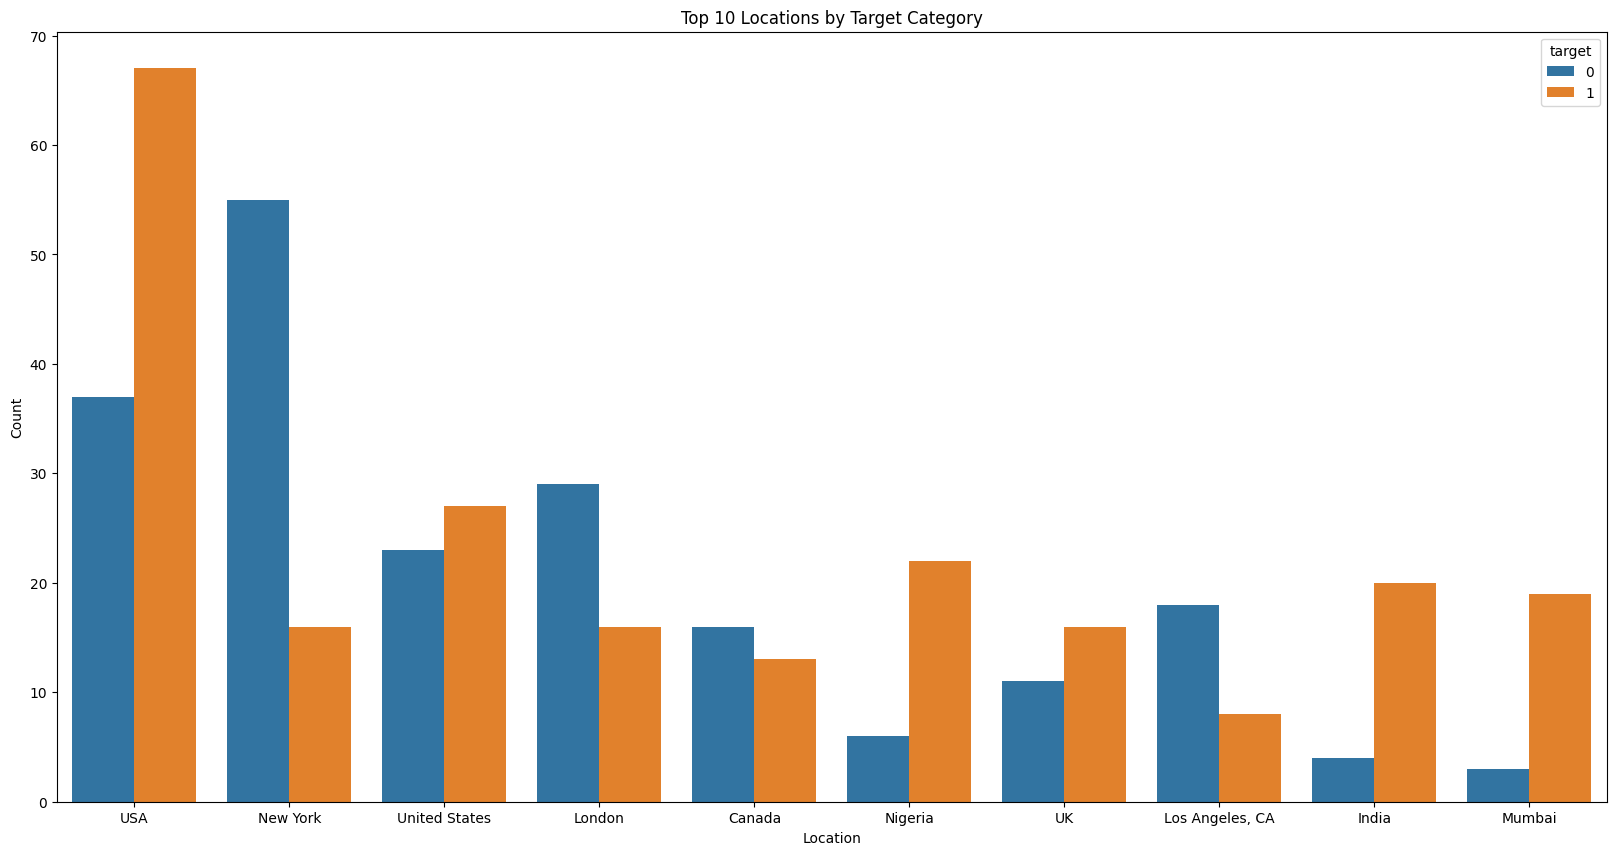

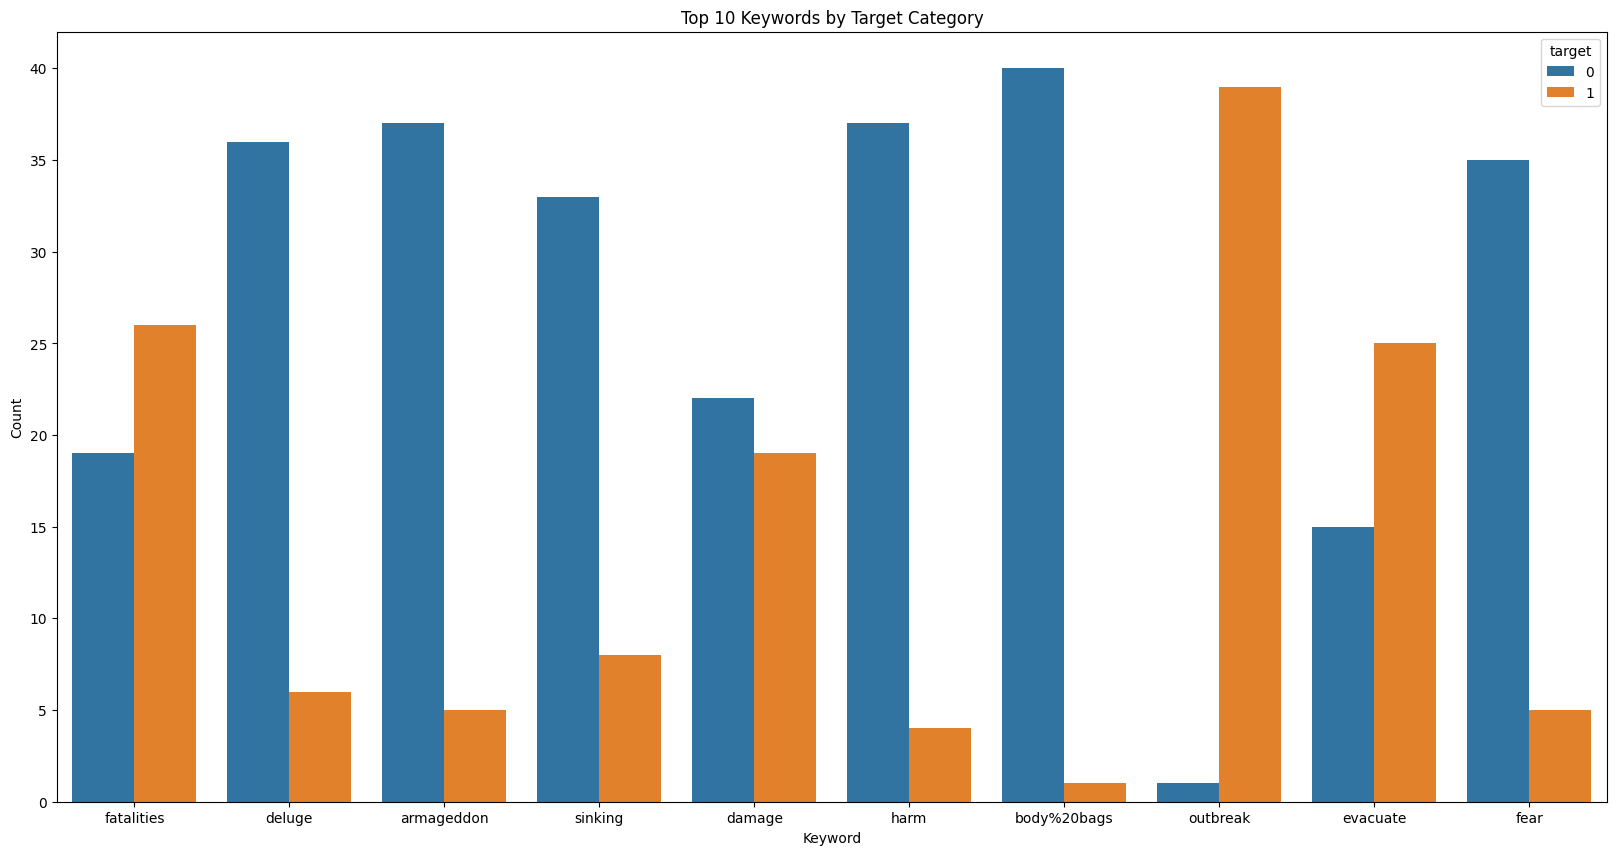

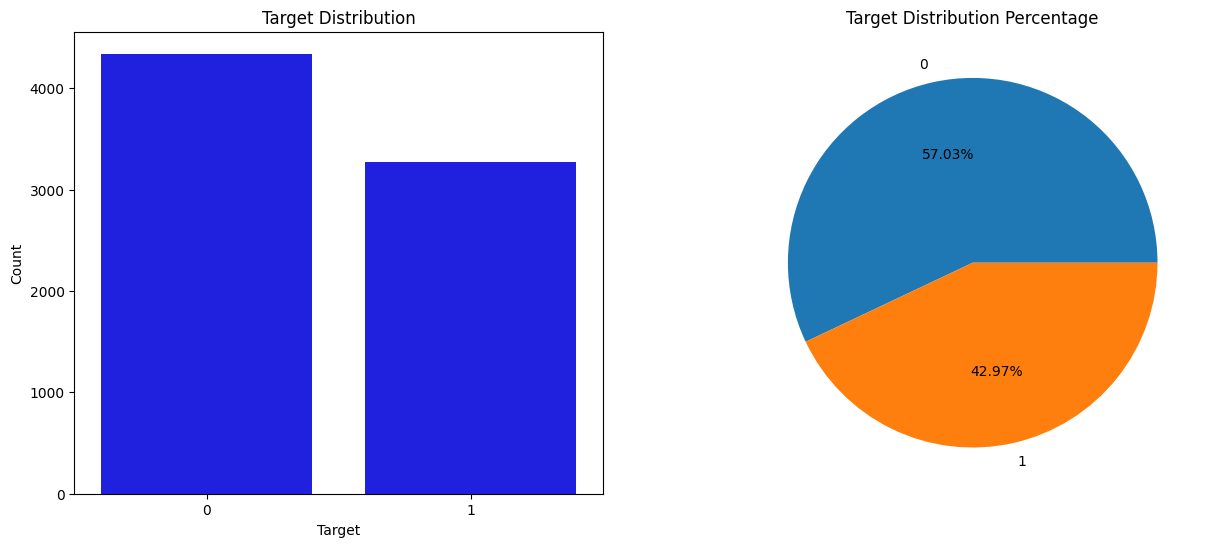


Location counts where target == 1 (top 20):
location
USA                 67
United States       27
Nigeria             22
India               20
Mumbai              19
UK                  16
London              16
New York            16
Washington, DC      15
Canada              13
Worldwide           12
Washington, D.C.     9
Chicago, IL          9
Australia            9
Indonesia            8
Los Angeles, CA      8
California, USA      8
Earth                8
California           7
New York, NY         7
Name: count, dtype: int64

Location counts where target == 0 (top 20):
location
New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
California         10
NYC                10
United Kingdom     10
ss                  9
London, England     9
Australia           9
Chicago, IL         9
304                 9
San Franci

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Load the training data from the CSV file
train_data = pd.read_csv('../input/nlp-getting-started/train.csv', sep=',')

# Exploratory Data Analysis (EDA)
# Inspect, Visualize and Clean the Data

# Counts of the 'keyword' variable:
# Frequency of each keyword in the dataset
print("Counts of 'keyword':")
print(train_data.keyword.value_counts())

# Counts of the 'location' variable:
# Display the top 20 most frequent locations
print("\nCounts of 'location' (top 20):")
print(train_data.location.value_counts().head(20))

# Check for duplicate values:
# Unique counts and sum of duplicates in 'id', 'keyword', 'location', 'text'
print("\nChecking for duplicates:")
unique_ids = train_data.id.nunique()
keyword_duplicates = train_data.keyword.duplicated().sum()
location_duplicates = train_data.location.duplicated().sum()
text_duplicates = train_data.text.duplicated().sum()

print(f"Unique IDs: {unique_ids}")
print(f"Duplicate keywords: {keyword_duplicates}")
print(f"Duplicate locations: {location_duplicates}")
print(f"Duplicate texts: {text_duplicates}")

# Identify and display all duplicate text entries:
duplicate_text_entries = train_data[train_data.duplicated(['text'])]
print(f"\nDuplicate text entries (total {len(duplicate_text_entries)} rows):")
print(duplicate_text_entries)

# Example duplicates to inspect:
print("\nExample duplicate texts:")
print(train_data.text[48])
print(train_data.text[115])
print(train_data.text[119])

# Visualization: Location vs Target
# Bar plot of the ten most common locations, color-coded by 'target'
plt.figure(figsize=(20, 10))
sb.countplot(data=train_data, x='location', order=train_data['location'].value_counts().head(10).index, hue='target')
plt.title('Top 10 Locations by Target Category')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Visualization: Keyword vs Target
# Bar plot of the ten most common keywords, color-coded by 'target'
plt.figure(figsize=(20, 10))
sb.countplot(data=train_data, x='keyword', order=train_data['keyword'].value_counts().head(10).index, hue='target')
plt.title('Top 10 Keywords by Target Category')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.show()

# Visualization: Target Distribution
# Bar plot and pie chart of target variable distribution
plt.figure(figsize=(15, 6))

# Bar plot for target distribution
plt.subplot(1, 2, 1)
# Define the color variable
color = 'blue' # Example color, you can change it
sb.countplot(data=train_data, x='target', color=color)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

# Pie chart for target distribution
plt.subplot(1, 2, 2)
train_data.target.value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=0)
plt.title('Target Distribution Percentage')
plt.ylabel('')

plt.show()

# Insightful data for target=1 and target=0
print("\nLocation counts where target == 1 (top 20):")
print(train_data[train_data.target == 1].location.value_counts().head(20))

print("\nLocation counts where target == 0 (top 20):")
print(train_data[train_data.target == 0].location.value_counts().head(20))

print("\nKeyword counts where target == 1 (top 20):")
print(train_data[train_data.target == 1].keyword.value_counts().head(20))

print("\nKeyword counts where target == 0 (top 20):")
print(train_data[train_data.target == 0].keyword.value_counts().head(20))

# Data Cleaning: Drop 'location' and 'keyword' columns and all duplicate rows
train_data.drop(['location', 'keyword'], axis=1, inplace=True)
train_data.drop_duplicates(inplace=True)

# Verify data shape after cleaning
print("\nData shape after cleaning:", train_data.shape)

# Sampling five random entries from cleaned data for review
print("\nRandom sample after cleaning:")
print(train_data.sample(5))



In this section, we focus on preprocessing the text data, which is a crucial step for any Natural Language Processing (NLP) project. Text preprocessing involves cleaning and transforming raw text data into a structured and suitable format for model training. This ensures that the text input is free from noise and standardized, enabling the machine learning models to better understand and learn from the data.

# **Features and Mechanism**
**Regular Expressions for URL Detection:**

A regular expression pattern (url_regex) is defined to identify URLs within the text. Detecting and handling URLs is important to remove irrelevant information that could skew the analysis.
Tokenization Function:

**Purpose:**
The tokenize function is designed to clean and tokenize text data. This function performs a series of preprocessing steps to convert raw text into a purified and tokenized form.
URL Replacement:
URLs detected using the regular expression are replaced with the placeholder ‘urlplaceholder’ to standardize and remove actual URLs.
Text Normalization:
The text is converted to lowercase to ensure uniformity.
Digits are removed to eliminate non-alphabetical characters.
Mentions (@usernames) and hashtags (#tags) are stripped to reduce noise.
HTML tags and content inside brackets are removed to clean the text further.
Punctuation Removal:
Punctuation marks are removed to simplify the text structure.
Tokenization:
The text is tokenized into individual words, providing a granular level of text manipulation.
Stopwords Removal:
Common stopwords are removed to focus on the meaningful words that contribute more significantly to the context of the text.
Lemmatization:
Each word is lemmatized using the WordNet lemmatizer, converting words to their root form to standardize different variations of a word.
Application of Tokenization Function:

The tokenize function is applied to the text column of the training dataset. This process iterates over each text entry, ensuring that all text data is consistently cleaned and tokenized.

**Verification of Cleaned Data:**

A random sample of 10 entries from the cleaned dataset is displayed to review the effect of the tokenization function and ensure that the preprocessing steps have been correctly applied.
This preprocessing pipeline effectively prepares the text data by addressing common text anomalies and standardizing the format, laying a solid foundation for accurate and effective NLP model training.



In [6]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Regular expression to match URLs
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def tokenize(text):
    """
    Function to clean and tokenize text data.

    Params:
        text (str): The text to be processed.

    Returns:
        str: The cleaned and tokenized text.
    """
    # Detect and extract URLs using regex
    detected_urls = re.findall(url_regex, text)

    # Replace each URL in the text with a placeholder
    for url in detected_urls:
        text = text.replace(url, 'urlplaceholder')

    # Convert text to lowercase
    text = text.lower()

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove @mentions and hashtags
    text = re.sub(r'@([a-z0-9]+)|#', '', text)

    # Remove HTML tags and content inside brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Tokenize text into words
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word to get its root form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    cleaned_text = ' '.join(lemmatized_words)

    return cleaned_text

# Apply the tokenization function to the 'text' column in the training data
train_data['text'] = train_data['text'].apply(tokenize)

# Display a random sample of 10 entries from the cleaned dataset
print("\nSample of cleaned text data:")
print(train_data.sample(10))



Sample of cleaned text data:
        id                                               text  target
5573  7953  rainstorm im huge football fan know ive never ...       0
2307  3311     make feel better im level still get demolished       0
6469  9253                            sunk leave school month       0
6279  8970  warcraft inspired mode likely coming hero stor...       0
3251  4672  came land engulfed tribal war turned land peac...       0
4397  6253  hot funtenna hijacking computer send data soun...       0
6626  9490  truth urlplaceholder news bbc cnn islam truth ...       1
258    368  reject law misguided false prophet imprison na...       0
6448  9223  number security official killed pkk terror att...       1
500    725  christian attacked muslim temple mount waving ...       1


In this section, we focus on preparing our text data for input into a deep learning model using TensorFlow and Keras. This involves transforming our preprocessed text data into numerical sequences that can be processed by machine learning models, particularly neural networks.

# **Features and Mechanism**
**Library Imports:**

We start by importing necessary libraries from TensorFlow and Keras, specifically the Tokenizer and pad_sequences utilities. These tools are essential for converting text into numerical data suitable for deep learning models.

**Tokenizer Configuration:**

Maximum Number of Words (MAX_NB_WORDS):
We set a limit on the vocabulary size to 2000 words based on word frequency. This helps in maintaining a manageable size for our vocabulary, focusing on the most relevant words in the dataset.
Tokenizer Initialization:
A Tokenizer object is initialized with the specified maximum number of words and a space (' ') as the delimiter. The tokenizer is responsible for creating a word index based on the frequency of words in the dataset.

**Creating the Vocabulary:**

The tokenizer is fitted on the text data (train_data['text'].values), which involves analyzing the text and creating a vocabulary index. This step maps each word in the text data to a unique integer based on its frequency.
Text to Sequence Conversion:

The fitted tokenizer is then used to convert the text data into sequences of integers (X). Each word in the text is replaced by its corresponding integer index from the tokenizer’s vocabulary.

**Sequence Padding:**

To ensure uniform input size, sequences are padded using the pad_sequences function. Padding is added at the start of sequences to match the length of the longest sequence in the dataset. This is crucial for batch processing in neural networks where input dimensions must be consistent.
Target Extraction:

The target variable (train_data['target']) is extracted into a variable y. This will be used as the ground truth labels for our model during training.
Inspection of Tokenized Sequences:

The first five tokenized sequences are printed to inspect and validate the transformation from text to numerical sequences. This helps in understanding how the text data has been converted and whether the preprocessing steps have been correctly applied.


**Reverse Mapping (Optional):**

To demonstrate the tokenization and padding process, we showcase how tokenized sequences can be converted back to text using the inverse operation (tokenizer.sequences_to_texts). This serves as a verification step to ensure that the tokenized sequences can still be interpreted correctly.
This preprocessing step effectively transforms textual data into padded integer sequences, making them suitable for input into neural network models. This structured representation of text data is crucial for deploying machine learning and deep learning techniques in NLP tasks.



In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum number of words to keep, based on word frequency
MAX_NB_WORDS = 2000

# Create a tokenizer object with the specified number of words and a space as the delimiter
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ')

# Fit the tokenizer on the training data text values
# This step creates the vocabulary index based on word frequency in the dataset
tokenizer.fit_on_texts(train_data['text'].values)

# Convert the text inputs to integer sequences according to the tokenizer's vocabulary
X = tokenizer.texts_to_sequences(train_data['text'].values)

# Pad sequences to ensure uniform input size by adding zero-padding
# at the start of sequences to match the longest sequence
X = pad_sequences(X)

# Extract the target values for classification
y = train_data['target']

# Print the first 5 tokenized sequences to inspect the output
print("First 5 tokenized sequences:")
print(X[:5])

# Demonstrate reverse mapping from sequences to text
# by transforming a list of token IDs back to words
print("\nExample of sequence converted back to text:")
example_sequence = tokenizer.sequences_to_texts([[449, 153, 67, 1389, 5]])
print(example_sequence)

# Convert the first 5 sequences back to text for validation
# Sequences are being shown for an initial understanding of the transformation
print("\nFirst 5 sequences converted back to text:")
texts_from_sequences = tokenizer.sequences_to_texts(X[:5])
print(texts_from_sequences)


First 5 tokenized sequences:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   453  154   68 1393    6]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   106    2  149  525 1060]
 [   0    0    0    0    0    0    0    0    0 1524 1394 1862  454  317
   161 1862  454  360  949]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    11   76  161  360   33]
 [   0    0    0    0    0    0    0    0    0    0    0    0   30 1061
   111 1863  183   76   97]]

Example of sequence converted back to text:
['demolish content hiroshima grows im']

First 5 sequences converted back to text:
['reason earthquake may allah u', 'forest fire near la canada', 'resident asked shelter place officer evacuation shelter place order expected', 'people wildfire evacuation order california', 'got sent photo alaska smoke wildfire school']


In this section, we focus on dividing our processed text data into training and testing sets. This step is critical for evaluating the performance of our machine learning models. By separating our data into these two sets, we ensure that the model is tested on data it hasn’t seen before, which provides a more accurate measure of its generalization capability.

# **Features and Mechanism**

**Library Imports:**

We import numpy for numerical operations and train_test_split from scikit-learn for splitting the dataset.
Data Splitting:

**Train-Test Split:**
The train_test_split function is utilized to split the dataset into training and testing sets, adhering to an 80-20 split ratio. This means 80% of the data is used for training the model (X_train and y_train), while the remaining 20% is used for testing the model (X_test and y_test).
The random_state parameter is set to 42 to ensure the split is reproducible. This means every time we run this code with the same data, we will get the same training and testing sets.

**Verifying Split Dimensions:**

We print the shapes of the training and testing datasets to verify the dimensions. This step is crucial to ensure that the data has been split correctly:
X_train and X_test contain the padded sequences for training and testing, respectively.
y_train and y_test contain the corresponding target labels for training and testing.

**Inspection of Split Data:**

Sample Display:
We print the first five samples from each of the training and testing sets (both input sequences and target labels). This helps in verifying the content and format of the splits, providing a snapshot of the data being fed into the model.

**Formatted Padded Sequences:**

For a more user-friendly inspection, we format and print individual sequences from the training data. This ensures that each sequence can be visually checked to confirm proper padding and consistency.
By splitting the dataset into training and testing sets, we lay the groundwork for accurate model evaluation, helping us understand how well our model can generalize to new, unseen data. This step is fundamental in building robust machine learning models and ensuring their reliability in real-world applications.

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Split data into training and testing sets
# Using an 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verify dimensions of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Optional: Print a few samples of the training and testing data
print("\nFirst 5 samples from X_train:")
print(X_train[:5])

print("\nFirst 5 samples from X_test:")
print(X_test[:5])

print("\nFirst 5 samples from y_train:")
print(y_train[:5])

print("\nFirst 5 samples from y_test:")
print(y_test[:5])

# Ensure data samples are visually easier to inspect if needed
print("\nSample of the padded sequences from training data (formatted):")
for i, sample in enumerate(X_train[:5]):
    print(f"Sample {i+1}: {sample}\n")


Shape of X_train: (6090, 19)
Shape of X_test: (1523, 19)
Shape of y_train: (6090,)
Shape of y_test: (1523,)

First 5 samples from X_train:
[[   0    0    0    0    0    0    0    0    0    0    0   63  458  138
    38   67  967  169    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  516 1582  354  139]
 [   0    0    0    0    0    0    0    0  483 1809    6 1115  333  205
  1488  278    4   47    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0  858  311
   642 1380  171 1452    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   401  391    4  392  368]]

First 5 samples from X_test:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    8   71  123  292]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    93   30  330   52 1548]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   47   23 1650    1]
 [   0    0    0    0    0    

In this section, we complete the end-to-end process of building, training, evaluating, and visualizing the results of a Long Short-Term Memory (LSTM) neural network for a text classification task. LSTMs are a type of recurrent neural network (RNN) capable of learning long-term dependencies, making them particularly well-suited for sequential data like text.

# Features and Mechanism

**Library Imports and Data Splitting:**

We import the necessary libraries from TensorFlow and Keras for building the neural network, and from sklearn for data splitting and evaluation metrics.
The data is split into training and testing sets using an 80-20 split. This ensures that the model is trained on a majority of the data while a portion is reserved for testing its performance.
Building the LSTM Model:

**A Sequential model is initialized:**

Embedding Layer:
The first layer is an Embedding layer, which transforms integer-encoded words into dense vectors of fixed size. This layer is configured with an input dimension of 20,000 (vocabulary size), output dimension of 32 (embedding size), and input length matching the training data sequence length.
LSTM Layer:
An LSTM layer with 60 units is added, using the ‘relu’ activation function to introduce non-linearity. LSTMs help capture the temporal dependencies in the data.
Dropout Layer:
A Dropout layer with a dropout rate of 0.1 is included to prevent overfitting by randomly setting a fraction of inputs to zero during training.
Dense Output Layer:
The final layer is a Dense layer with a single unit and ‘sigmoid’ activation for binary classification.
The model is compiled using binary crossentropy as the loss function and Adam as the optimizer, with accuracy as the evaluation metric.
Training the Model:

The model is trained on the training data (X_train, y_train) over 10 epochs with a batch size of 32. Validation data (X_test, y_test) is used to monitor the model’s performance across epochs.
Training History and Visualization:

The training history (accuracy and loss) is converted into a Pandas DataFrame for easier manipulation.
Training and validation accuracy and loss are plotted over epochs to visualize the model’s learning process and to detect any signs of overfitting or underfitting.

Making Predictions:

Predictions are made on the test set (X_test). The predicted probabilities are thresholded at 0.5 to generate binary class predictions.
Model Evaluation:

Classification Report:
A detailed classification report is generated to show precision, recall, and F1-score for each class.
Evaluation Metrics:
Overall accuracy, recall, and precision are computed and printed to summarize the model’s performance.
Confusion Matrix:

A confusion matrix is computed and visualized using a heatmap. This matrix helps in understanding the performance by showing the distribution of true positive, true negative, false positive, and false negative predictions.
Final Model Evaluation:

The model is evaluated on the test set to obtain the final loss and accuracy metrics, providing a conclusive performance summary.
This comprehensive approach ensures the model is rigorously trained, evaluated, and visualized, enabling a thorough understanding of its strengths and weaknesses in handling the text classification task.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6249 - loss: 0.6385 - val_accuracy: 0.7905 - val_loss: 0.4747
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8225 - loss: 0.4183 - val_accuracy: 0.8017 - val_loss: 0.4422
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8644 - loss: 0.3281 - val_accuracy: 0.7800 - val_loss: 0.4676
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8660 - loss: 0.3121 - val_accuracy: 0.7912 - val_loss: 0.5028
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8796 - loss: 0.2883 - val_accuracy: 0.7781 - val_loss: 0.5070
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8898 - loss: 0.2588 - val_accuracy: 0.7781 - val_loss: 0.5785
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8966 - loss: 0.2436 - val_accuracy: 0.7603 - val_loss: 0.6989
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9036 - loss: 0.2351 - val_accu

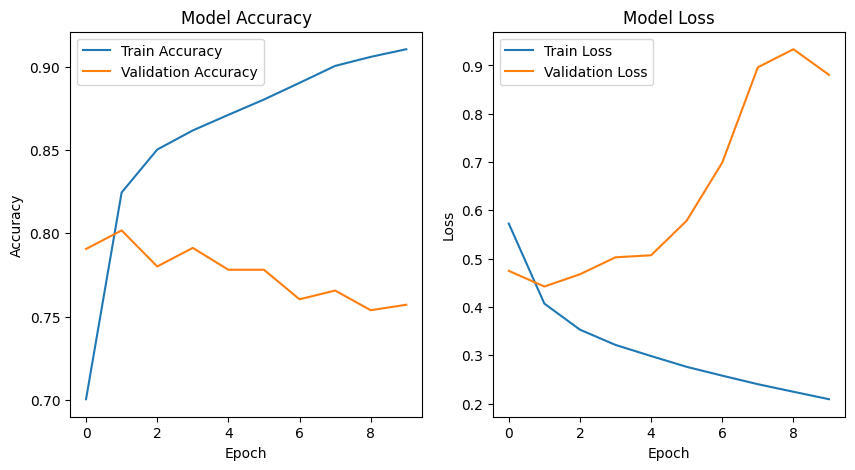

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report:
                 precision    recall  f1-score   support

No Disaster (0)       0.78      0.80      0.79       874
   Disaster (1)       0.72      0.70      0.71       649

       accuracy                           0.76      1523
      macro avg       0.75      0.75      0.75      1523
   weighted avg       0.76      0.76      0.76      1523


Accuracy: 0.7570584372948129
Recall: 0.699537750385208
Precision: 0.7217806041335453


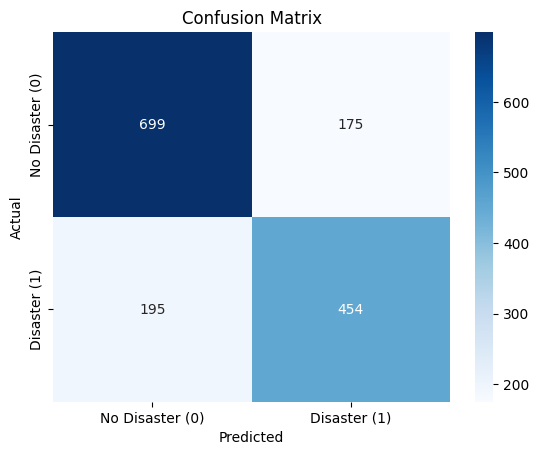

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7429 - loss: 1.1493

Final Evaluation - Loss: 0.880476176738739, Accuracy: 0.7570584416389465


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Step 1: Splitting the Data
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 2: Building the LSTM Model
lstm_model = Sequential()

# Adding the Embedding layer with an input dimension of 20000, output dimension of 32, and input length as the shape of the training data
lstm_model.add(Embedding(input_dim=20000, output_dim=32, input_length=X_train.shape[1]))

# Adding LSTM layer with 60 units and 'relu' activation function
lstm_model.add(LSTM(units=60, activation='relu'))

# Adding Dropout layer with a dropout rate of 0.1
lstm_model.add(Dropout(0.1))

# Adding a Dense output layer with 'sigmoid' activation function
lstm_model.add(Dense(1, activation='sigmoid'))

# Compiling the model with binary crossentropy loss and Adam optimizer
optimizer = Adam(learning_rate=0.001)
lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the summary of the model architecture
lstm_model.summary()

# Step 3: Training the Model
fit_model = lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test)
)

# Step 4: Converting the Training History to a DataFrame
history_df = pd.DataFrame(fit_model.history)

# Step 5: Visualizing the Training Process
plt.figure(figsize=(10, 5))

# Plotting accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plotting loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Step 6: Making Predictions
y_pred_prob = lstm_model.predict(X_test, verbose=1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 7: Evaluating the Model
# Generating a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disaster (0)', 'Disaster (1)']))

# Printing Evaluation Metrics
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

# Step 8: Confusion Matrix and Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disaster (0)', 'Disaster (1)'], yticklabels=['No Disaster (0)', 'Disaster (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Evaluate the model and display final accuracy
final_loss, final_accuracy = lstm_model.evaluate(X_test, y_test)

print(f"\nFinal Evaluation - Loss: {final_loss}, Accuracy: {final_accuracy}")


In this section, we handle the preprocessing and prediction steps for a separate test dataset using a previously trained Long Short-Term Memory (LSTM) model. This involves reading and cleaning the test data, tokenizing and padding the text inputs, generating predictions, and visualizing the results. These steps are critical for applying the trained model to real-world data and evaluating its performance in classifying unseen text.

# Features and Mechanism

**Reading and Inspecting Test Data:**

Loading the Dataset:
The test data is loaded from a CSV file using the pandas library. This step involves reading the file and displaying the first few records to inspect the structure and content of the dataset.

**Data Cleaning:**
Unnecessary columns (keyword and location) are dropped to simplify the dataset. This reduces the features to only those necessary for prediction.
Duplicate records are removed to ensure data integrity and consistency.
Tokenization and Sequencing:

**Text Tokenization:**
The text column is tokenized using a predefined tokenize function. This function cleans the text data by performing various preprocessing steps such as lowercasing, removing punctuation, and lemmatization.
An instance of Tokenizer from tensorflow.keras.preprocessing.text is created with a limit of 2000 words. This tokenizer is then fitted on the tokenized text data to build the vocabulary.

**Text to Sequence Conversion:**
The fitted tokenizer is used to convert the text data into integer sequences, which represent the words as indices in the tokenizer’s vocabulary.
These sequences are padded to ensure uniform length across all samples, which is crucial for input into neural network models.

**Prediction Using LSTM Model:**

The processed sequences are fed into the trained LSTM model to generate predictions. The output probabilities are converted into binary labels (0 for non-disaster, 1 for disaster) based on a threshold of 0.5.
Creating a Submission DataFrame:

A new DataFrame (submission_df) is created to hold the predicted labels along with the corresponding id from the test dataset.
The first few records of the submission DataFrame are displayed to verify the predictions.
Visualization of Predictions:

Distribution Plot:
The distribution of the predicted classes is visualized using a count plot from the seaborn library. This helps in understanding the model’s output distribution and assessing the balance between predicted classes.
The count of each class (0 and 1) in the predictions is also printed to provide a numerical summary.
By following these steps, we effectively apply our trained LSTM model to new, unseen data, generating predictions and visualizing the results to evaluate the model’s performance and understand its behavior on the test set. This process is essential for deploying machine learning models and deriving actionable insights from real-world data.

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
(3263, 2)
        id                                               text
1110  3671  something bad happens choice either let define...
498   1629                   bombing hiroshima urlplaceholder
1384  4560  new blog post emergencyresponse plan help empl...
1579  5333                even delay like bogged cpu gunsense
2720  9050  ntsb virgin galactic crash caused structural f...
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   498  853   54   40]
 [   0    0    0    0    0    0    0    0    0    0    0  184  211 1674
   122 

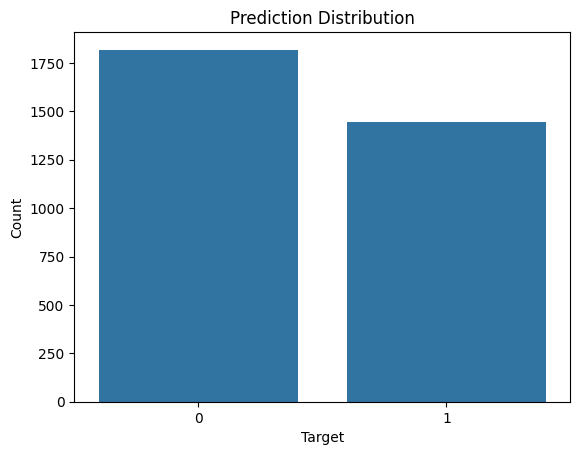

In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Read test data
# Load the test data file and display the first few records for inspection
test_data = pd.read_csv('../input/nlp-getting-started/test.csv', sep=',')
print(test_data.head())

# Drop unnecessary columns 'keyword' and 'location'
test_data.drop(['keyword', 'location'], axis=1, inplace=True)

# Remove duplicate records to clean the dataset
test_data.drop_duplicates(inplace=True)

# Display the shape of the cleaned test dataset
print(test_data.shape)

# Perform tokenization on the 'text' column (assuming a tokenize function is defined)
test_data['text'] = test_data['text'].apply(tokenize)

# Display a sample of the tokenized text data
print(test_data.sample(5))

# Initialize and fit the Tokenizer on the tokenized text data
tokenizer = Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(test_data['text'].values)

# Convert the text data to sequences of integers
X = tokenizer.texts_to_sequences(test_data['text'].values)

# Pad the sequences to ensure uniform length
X = pad_sequences(X)

# Display the first 5 padded sequences
print(X[:5])

# Demonstrate converting sequences back to text
print('\n\n', tokenizer.sequences_to_texts([[494, 850, 53, 39]]))
print(tokenizer.sequences_to_texts(X)[:5])

# Predict using the trained LSTM model
pred = lstm_model.predict(X)
print(pred)

# Convert predictions to binary labels (0 or 1)
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'target': list(map(lambda x: 0 if x < 0.5 else 1, pred))
})

# Display the first few predictions
print(submission_df.head())

# Plot the distribution of predicted classes
color = sb.color_palette()[0]
val = submission_df['target'].value_counts()
print(val)

sb.countplot(data=submission_df, x='target', color=color)
plt.title('Prediction Distribution')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()



In this section, we finalize the process by saving the predictions from our trained Long Short-Term Memory (LSTM) model into a CSV file. This includes inspecting the submission DataFrame, saving it to disk, and verifying the saved content. This step is essential for generating a submission file that can be used for further evaluation or submission to a competition platform.

# Features and Mechanism

**Inspection of the Submission DataFrame:**

Display Initial Rows:
Before saving, we print the first few rows of the submission_df DataFrame. This DataFrame contains the predicted classes for each tweet, allowing for a quick inspection to ensure that the data is correctly formatted and ready for submission.

**Saving to CSV:**

Save DataFrame:
The submission_df is saved to a CSV file named submission.csv using pandas’ to_csv method. Saving the DataFrame ensures that the predictions are stored persistently and can be used for further analysis or evaluation.
Verify Saved File:
To verify that the data was saved correctly, we read back the CSV file into a new DataFrame (saved_submission_df) and print the first 20 rows. This step ensures that the file was written correctly and that its contents are as expected.

**Explanation of Submission File:**

The submission_df comprises two columns:
‘id’: Contains unique identifiers for each tweet in the test dataset.
‘target’: Contains the binary predictions, where 1 indicates the tweet is related to a disaster and 0 indicates it is not.
These predictions are generated by our trained LSTM model based on the text content of each tweet.
Printing the first 20 rows of the saved submission file provides insight into the model’s predictions for each tweet. This helps validate that the data was correctly processed, tokenized, and classified by the LSTM model. Additionally, observing the distribution of classes can give a preliminary understanding of how balanced or imbalanced the predictions are, guiding further model evaluation and potential improvement strategies.

In [11]:
import pandas as pd

# Assuming the previous steps (data loading, cleaning, model prediction) are done and we have submission_df
# Display the first few rows of the submission DataFrame for inspection
print("First few rows of the submission DataFrame:")
print(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

# Verify the content of the saved file by reading it back and displaying the first 20 rows
saved_submission_df = pd.read_csv(submission_file_path)
print("\nFirst 20 rows of the saved submission file:")
print(saved_submission_df.head(20))

# Explanation
"""
The submission DataFrame comprises two columns: 'id' and 'target'. The 'id' column contains unique identifiers
for each tweet in the test dataset, while the 'target' column contains binary predictions indicating whether
a tweet is related to a disaster (1) or not (0). These predictions are generated by our trained LSTM model based
on the text content of each tweet.

Printing the first 20 rows of the saved submission file offers insight into the model's prediction for each tweet.
It helps to validate that the data was correctly processed, tokenized, and classified by the LSTM model. Observing
the distribution of classes can give a preliminary understanding of how balanced or imbalanced the predictions are,
guiding further model evaluation and potential improvement strategies.
"""


First few rows of the submission DataFrame:
   id  target
0   0       1
1   2       0
2   3       0
3   9       0
4  11       0

First 20 rows of the saved submission file:
    id  target
0    0       1
1    2       0
2    3       0
3    9       0
4   11       0
5   12       0
6   21       1
7   22       0
8   27       0
9   29       0
10  30       0
11  35       0
12  42       0
13  43       0
14  45       0
15  46       1
16  47       0
17  51       0
18  58       1
19  60       0


"\nThe submission DataFrame comprises two columns: 'id' and 'target'. The 'id' column contains unique identifiers\nfor each tweet in the test dataset, while the 'target' column contains binary predictions indicating whether\na tweet is related to a disaster (1) or not (0). These predictions are generated by our trained LSTM model based\non the text content of each tweet.\n\nPrinting the first 20 rows of the saved submission file offers insight into the model's prediction for each tweet.\nIt helps to validate that the data was correctly processed, tokenized, and classified by the LSTM model. Observing\nthe distribution of classes can give a preliminary understanding of how balanced or imbalanced the predictions are,\nguiding further model evaluation and potential improvement strategies.\n"

In [12]:
# Submit data:

submission_df.to_csv('submission.csv', index = False)